In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
data = pd.read_csv(r'D:\download 99\Dream\Ai_Roadmap\Machine Learning\Ml_projects\Bengaluru_House_pricing\Dataset\Bengaluru_House_Data.csv')

In [3]:
print("-----------------------------------shape Size----------------------------------------------")
print(data.shape)
data.head()

-----------------------------------shape Size----------------------------------------------
(13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# Extract the numerical value for number of bedrooms
data['BHK'] = data['size'].str.extract('(\\d+)').astype(float)
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2.0


In [5]:
print("-----------------------------------Data Type-----------------------------------------------")
print(data.dtypes)

-----------------------------------Data Type-----------------------------------------------
area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
BHK             float64
dtype: object


In [6]:
print("-----------------------------------Data unique---------------------------------------------")
print(data.nunique(), "\n")

-----------------------------------Data unique---------------------------------------------
area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
BHK               19
dtype: int64 



In [7]:
print("-----------------------------------Null values---------------------------------------------")
print(data.isnull().sum())

-----------------------------------Null values---------------------------------------------
area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
BHK               16
dtype: int64


**Drop unnecessary columns**

In [8]:
new_data = data.drop(["availability","society","size"], axis=1)
new_data.head()

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2.0


**Handling null values**

i used: 

    mode for "location"
    mean for "bath","balcony","BHK"

In [9]:
# Use a dictionary-based filling method
new_data.fillna({'location': new_data['location'].mode()[0],
                 'bath': new_data['bath'].mean(),
                 'balcony': new_data['balcony'].mean(),
                 'BHK': new_data['BHK'].mean()}, inplace=True)

# Check for null values after filling
print("--------------------Check Null Data after Applying Missing Value---------------------")
print(new_data.isna().sum())


--------------------Check Null Data after Applying Missing Value---------------------
area_type     0
location      0
total_sqft    0
bath          0
balcony       0
price         0
BHK           0
dtype: int64


**Encoding**

I used label encoding for "area_type" 

In [10]:
from sklearn.preprocessing import LabelEncoder
# label Encoding or we can use cat.codes
new_data['area_type'] = new_data['area_type'].astype('category') # Convert the 'object' column to categorical
new_data['area_type'] = new_data['area_type'].cat.codes
print(new_data['area_type'].value_counts())

area_type
3    8790
0    2418
2    2025
1      87
Name: count, dtype: int64


And i grouped the location that has distribution less than 10 into other 

In [11]:
# Strip whitespace from the 'location' column
new_data['location'] = new_data['location'].apply(lambda x: x.strip())
# Group by the 'location' and count occurrences
location_stats = new_data.groupby('location')['location'].agg('count').sort_values(ascending=False)
# Display the location statistics
print(location_stats)

location
Whitefield               542
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
sapthagiri Layout          1
sarjapura main road        1
kamanahalli main road      1
kanakapura main road       1
kanakapura road            1
Name: location, Length: 1294, dtype: int64


In [12]:
len(location_stats[location_stats<=10])

1053

In [13]:
location_stats_less_than_10 = location_stats[location_stats<=10]
new_data['location'] = new_data.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(new_data.location.unique())

242

In [14]:
# One-Hot Encoding for the 'location' column
new_data = pd.get_dummies(new_data, columns=['location'], prefix='location')

# Display the first few rows of the updated DataFrame
new_data.head()


,area_type,total_sqft,bath,balcony,price,BHK,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,3,1056,2.0,1.0,39.07,2.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,2600,5.0,3.0,120.00,4.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,1440,2.0,3.0,62.00,3.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,1521,3.0,1.0,95.00,3.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,1200,2.0,1.0,51.00,2.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Cleaning**

I found that "total_sqft" containes ranges and values with unites so i build a function that takes the average of these ranges and convert the unites into sqft

In [15]:
# Identify unique non-numeric values in the total_sqft column
non_numeric_values = new_data['total_sqft'][~new_data['total_sqft'].str.isnumeric()].unique()

print(non_numeric_values)


['2100 - 2850' '1330.74' '3010 - 3410' '2957 - 3450' '3067 - 8156'
 '1042 - 1105' '1563.05' '1145 - 1340' '1015 - 1540' '1520 - 1740'
 '2023.71' '1113.27' '34.46Sq. Meter' '1752.12' '1195 - 1440'
 '1200 - 2400' '4125Perch' '1120 - 1145' '4400 - 6640' '3090 - 5002'
 '4400 - 6800' '1160 - 1195' '1000Sq. Meter' '4000 - 5249' '1115 - 1130'
 '1100Sq. Yards' '520 - 645' '1000 - 1285' '3606 - 5091' '650 - 665'
 '633 - 666' '2112.95' '5.31Acres' '30Acres' '1445 - 1455' '884 - 1116'
 '850 - 1093' '1440 - 1884' '1558.67' '3467.86' '716Sq. Meter'
 '547.34 - 827.31' '804.1' '580 - 650' '3425 - 3435' '1269.72'
 '1804 - 2273' '3630 - 3800' '660 - 670' '1500Sq. Meter' '620 - 933'
 '142.61Sq. Meter' '2695 - 2940' '2000 - 5634' '1574Sq. Yards'
 '3450 - 3472' '2479.13' '2172.65' '581.91' '1250 - 1305' '670 - 980'
 '1005.03 - 1252.49' '1004 - 1204' '361.33Sq. Yards' '645 - 936'
 '2710 - 3360' '1452.55' '2249.81 - 4112.19' '3436 - 3643' '2830 - 2882'
 '596 - 804' '1776.42' '1255 - 1863' '1300 - 1405' '150

In [16]:
import re

def clean_total_sqft(val):
    # Case 1: If the value is a range (e.g., "1500 - 1800")
    if '-' in val:
        vals = val.split('-')
        return (float(vals[0]) + float(vals[1])) / 2  # Take the average of the range
    
    # Case 2: Unit conversion
    if 'Meter' in val:
        return float(re.findall(r'\d+\.?\d*', val)[0]) * 10.7639  # Convert Sq. Meter to Sq. Ft.
    elif 'Yards' in val:
        return float(re.findall(r'\d+\.?\d*', val)[0]) * 9  # Convert Sq. Yards to Sq. Ft.
    elif 'Acre' in val:
        return float(re.findall(r'\d+\.?\d*', val)[0]) * 43560  # Convert Acres to Sq. Ft.
    elif 'Sq' in val:  # Assume this is already in Sq. Ft.
        return float(re.findall(r'\d+\.?\d*', val)[0])
    
    # Case 3: Numeric values
    try:
        return float(val)
    except ValueError:
        return np.nan  # Return NaN if conversion fails

# Apply the cleaning function to the column
new_data['total_sqft_cleaned'] = new_data['total_sqft'].apply(clean_total_sqft)

# Check the cleaned column
print(new_data[['total_sqft', 'total_sqft_cleaned']].head())


  total_sqft  total_sqft_cleaned
0       1056              1056.0
1       2600              2600.0
2       1440              1440.0
3       1521              1521.0
4       1200              1200.0


In [17]:
new_data = new_data.drop(["total_sqft"], axis=1)
new_data.head()

,area_type,bath,balcony,price,BHK,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,...,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other,total_sqft_cleaned
0,3,2.0,1.0,39.07,2.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1056.0
1,2,5.0,3.0,120.00,4.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2600.0
2,0,2.0,3.0,62.00,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1440.0
3,3,3.0,1.0,95.00,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1521.0
4,3,2.0,1.0,51.00,2.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1200.0


**feature engineering**

I add a new column called "price_per_sqft" where i converted the currency and divided on "total_sqft_cleaned"

In [18]:
new_data["price_per_sqft"] = new_data["price"]*100000/new_data["total_sqft_cleaned"]
new_data.head() 

,area_type,bath,balcony,price,BHK,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,...,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other,total_sqft_cleaned,price_per_sqft
0,3,2.0,1.0,39.07,2.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1056.0,3699.810606
1,2,5.0,3.0,120.00,4.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2600.0,4615.384615
2,0,2.0,3.0,62.00,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1440.0,4305.555556
3,3,3.0,1.0,95.00,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1521.0,6245.890861
4,3,2.0,1.0,51.00,2.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1200.0,4250.000000


**Outliers**

In [19]:
new_data.describe()

,area_type,bath,balcony,price,BHK,total_sqft_cleaned,price_per_sqft
count,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.331400e+04,1.331400e+04
mean,2.290315,2.692610,1.584376,112.565627,2.803743,1.773683e+03,7.904885e+03
std,1.143846,1.337777,0.798360,148.971674,1.294196,1.312067e+04,1.062731e+05
min,0.000000,1.000000,0.000000,8.000000,1.000000,1.000000e+00,2.257423e+00
25%,2.000000,2.000000,1.000000,50.000000,2.000000,1.100000e+03,4.262295e+03
50%,3.000000,2.000000,2.000000,72.000000,3.000000,1.277000e+03,5.429218e+03
75%,3.000000,3.000000,2.000000,120.000000,3.000000,1.680000e+03,7.313266e+03
max,3.000000,40.000000,3.000000,3600.000000,43.000000,1.306800e+06,1.200000e+07


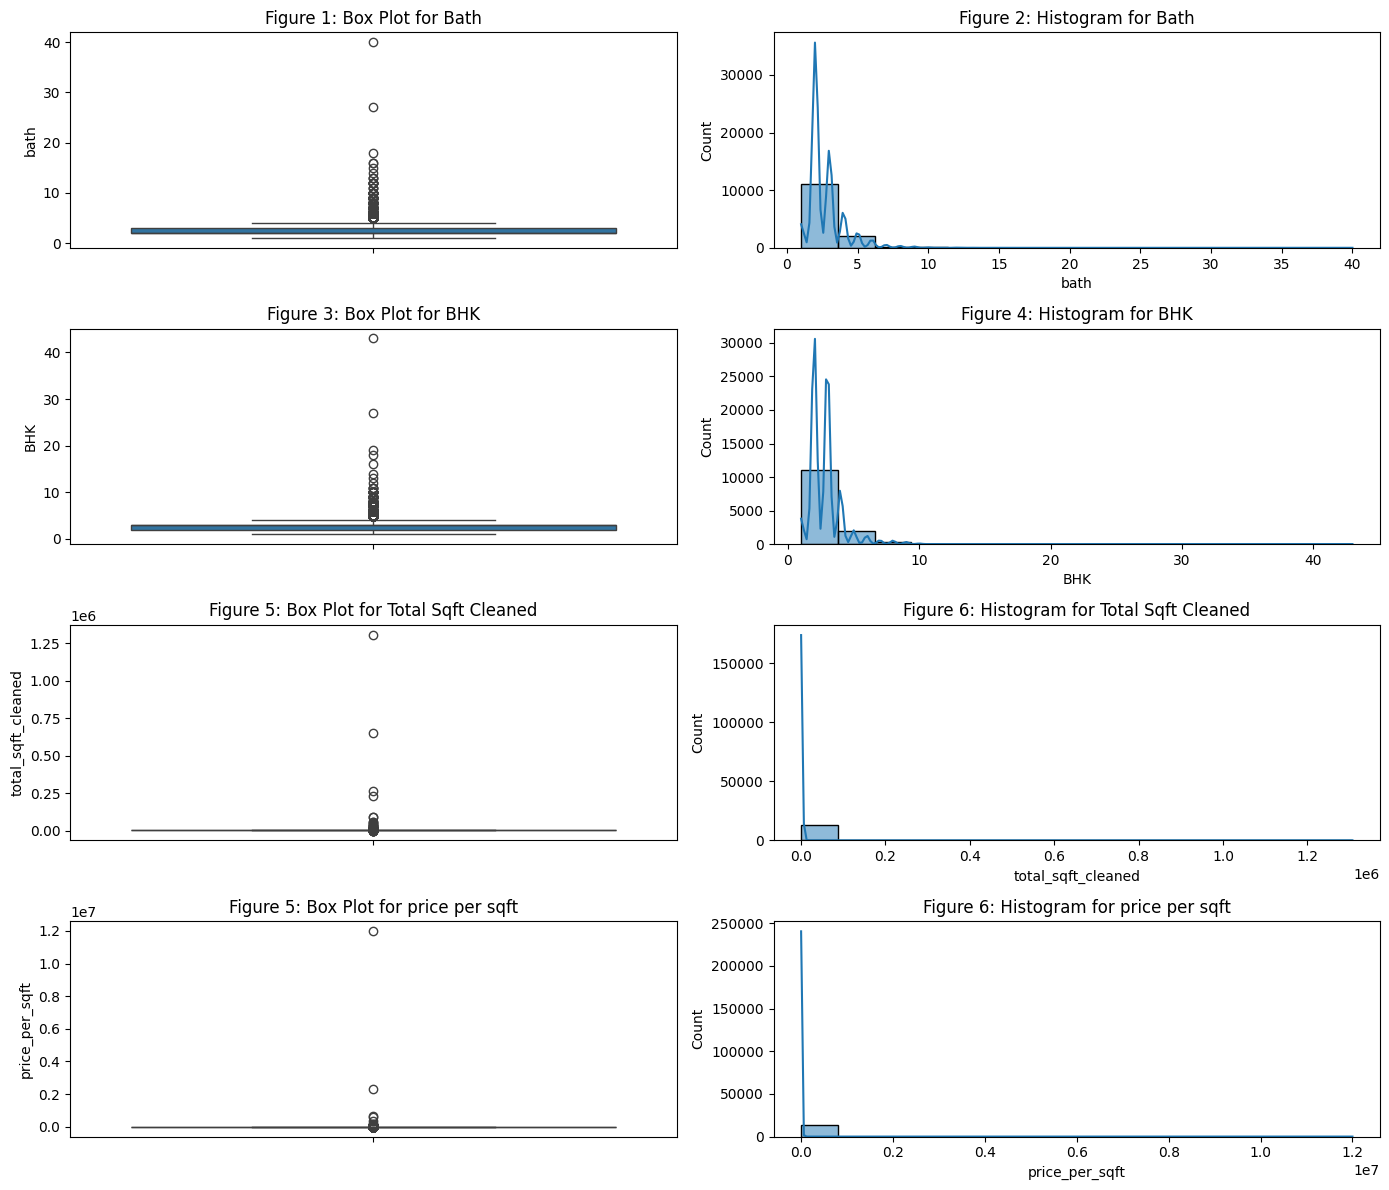

In [20]:
# Create a figure with 3 rows and 2 columns (3x2 grid)
fig, ax = plt.subplots(4, 2, figsize=(14, 12))  # figsize adjusts the size of the plots

# Box Plot for 'bath' (Figure 1)
sns.boxplot(new_data["bath"], ax=ax[0, 0])
ax[0, 0].set_title('Figure 1: Box Plot for Bath')

# Histogram for 'bath' with KDE (Figure 2)
sns.histplot(new_data["bath"], kde=True, bins=15, ax=ax[0, 1])
ax[0, 1].set_title('Figure 2: Histogram for Bath')

# Box Plot for 'BHK' (Figure 3)
sns.boxplot(new_data["BHK"], ax=ax[1, 0])
ax[1, 0].set_title('Figure 3: Box Plot for BHK')

# Histogram for 'BHK' with KDE (Figure 4)
sns.histplot(new_data["BHK"], kde=True, bins=15, ax=ax[1, 1])
ax[1, 1].set_title('Figure 4: Histogram for BHK')

# Box Plot for 'total_sqft_cleaned' (Figure 5)
sns.boxplot(new_data["total_sqft_cleaned"], ax=ax[2, 0])
ax[2, 0].set_title('Figure 5: Box Plot for Total Sqft Cleaned')

# Histogram for 'total_sqft_cleaned' with KDE (Figure 6)
sns.histplot(new_data["total_sqft_cleaned"], kde=True, bins=15, ax=ax[2, 1])
ax[2, 1].set_title('Figure 6: Histogram for Total Sqft Cleaned')

# Box Plot for 'total_sqft_cleaned' (Figure 5)
sns.boxplot(new_data["price_per_sqft"], ax=ax[3, 0])
ax[3, 0].set_title('Figure 5: Box Plot for price per sqft')

# Histogram for 'total_sqft_cleaned' with KDE (Figure 6)
sns.histplot(new_data["price_per_sqft"], kde=True, bins=15, ax=ax[3, 1])
ax[3, 1].set_title('Figure 6: Histogram for price per sqft')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


In [21]:
def remove_outliers_IQR(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the data to remove outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return filtered_df

# Apply the function to remove outliers from 'BHK', 'bath', and 'total_sqft_cleaned'
new_data1 = remove_outliers_IQR(new_data, 'BHK')
new_data1 = remove_outliers_IQR(new_data1, 'bath')
new_data1 = remove_outliers_IQR(new_data1, 'total_sqft_cleaned')
new_data1 = remove_outliers_IQR(new_data1, 'price_per_sqft')

# Display the shape of the original and filtered data
print(f"Original data size: {new_data.shape}")
print(f"Data size after removing outliers: {new_data1.shape}")


Original data size: (13320, 249)
Data size after removing outliers: (10362, 249)


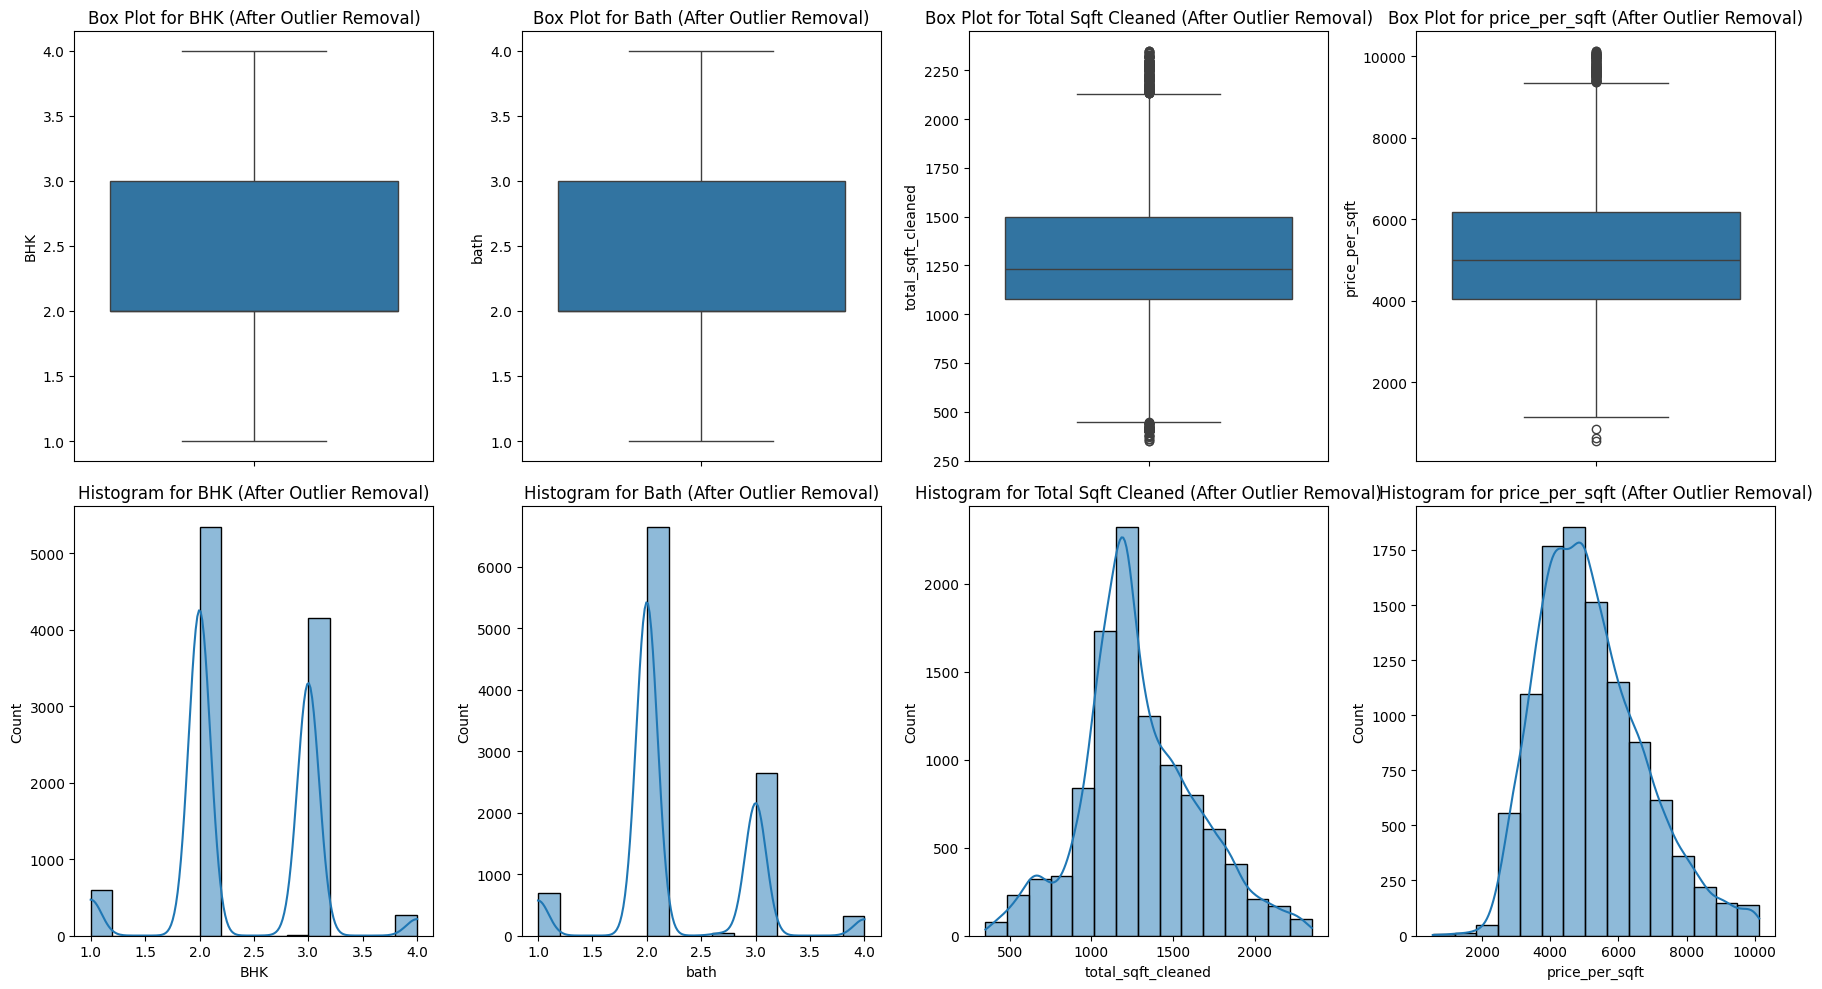

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 6 subplots (2 rows, 3 columns)
fig, ax = plt.subplots(2, 4, figsize=(18, 10))  # Adjust figsize to make it spacious

# Box Plot for 'BHK' (After Outlier Removal)
sns.boxplot(new_data1["BHK"], ax=ax[0, 0])
ax[0, 0].set_title('Box Plot for BHK (After Outlier Removal)')

# Histogram for 'BHK' with KDE (After Outlier Removal)
sns.histplot(new_data1["BHK"], kde=True, bins=15, ax=ax[1, 0])
ax[1, 0].set_title('Histogram for BHK (After Outlier Removal)')

# Box Plot for 'bath' (After Outlier Removal)
sns.boxplot(new_data1["bath"], ax=ax[0, 1])
ax[0, 1].set_title('Box Plot for Bath (After Outlier Removal)')

# Histogram for 'bath' with KDE (After Outlier Removal)
sns.histplot(new_data1["bath"], kde=True, bins=15, ax=ax[1, 1])
ax[1, 1].set_title('Histogram for Bath (After Outlier Removal)')

# Box Plot for 'total_sqft_cleaned' (After Outlier Removal)
sns.boxplot(new_data1["total_sqft_cleaned"], ax=ax[0, 2])
ax[0, 2].set_title('Box Plot for Total Sqft Cleaned (After Outlier Removal)')

# Histogram for 'total_sqft_cleaned' with KDE (After Outlier Removal)
sns.histplot(new_data1["total_sqft_cleaned"], kde=True, bins=15, ax=ax[1, 2])
ax[1, 2].set_title('Histogram for Total Sqft Cleaned (After Outlier Removal)')

# Box Plot for 'total_sqft_cleaned' (After Outlier Removal)
sns.boxplot(new_data1["price_per_sqft"], ax=ax[0, 3])
ax[0, 3].set_title('Box Plot for price_per_sqft (After Outlier Removal)')

# Histogram for 'total_sqft_cleaned' with KDE (After Outlier Removal)
sns.histplot(new_data1["price_per_sqft"], kde=True, bins=15, ax=ax[1, 3])
ax[1, 3].set_title('Histogram for price_per_sqft (After Outlier Removal)')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


In [23]:
new_data1.describe()

,area_type,bath,balcony,price,BHK,total_sqft_cleaned,price_per_sqft
count,10362.000000,10362.000000,10362.000000,10362.000000,10362.000000,10362.000000,10362.000000
mean,2.399054,2.253249,1.559639,68.842973,2.396221,1289.948396,5217.430676
std,1.146911,0.621186,0.764302,32.735089,0.636457,351.416622,1564.529648
min,0.000000,1.000000,0.000000,8.440000,1.000000,350.000000,556.306167
25%,3.000000,2.000000,1.000000,45.472500,2.000000,1080.000000,4050.000000
50%,3.000000,2.000000,2.000000,60.775000,2.000000,1230.500000,5000.000000
75%,3.000000,3.000000,2.000000,85.000000,3.000000,1500.000000,6169.307779
max,3.000000,4.000000,3.000000,225.000000,4.000000,2350.000000,10126.582278


**Model Evaluation**

In [24]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Prepare the features and labels
x = new_data1.drop(['price'], axis=1)  # Features
y = new_data1['price']  # Target labels

def evaluate_models(x, y):
    # Define models and their parameter grids
    algos = {
        'Linear Regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
            }
        },
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['friedman_mse', 'squared_error'],
                'splitter': ['best', 'random']
            }
        }
    }

    # Initialize results list
    results = []
    best_linear_model = None  # Variable to store the best Linear Regression model

    # Initialize KFold
    kf = KFold(n_splits=6, shuffle=True, random_state=42)

    # Iterate through models
    for algo_name, config in algos.items():
        print(f"Evaluating model: {algo_name}")

        # Set up GridSearchCV
        grid_search = GridSearchCV(config['model'], config['params'], cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

        # Fit the model with cross-validation
        grid_search.fit(x, y)

        # Retrieve the best model and its parameters
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

        # Check if it's the best Linear Regression model
        if algo_name == 'Linear Regression':
            best_linear_model = best_model

        # Arrays to store training and testing metrics
        train_rmse_list, test_rmse_list = [], []
        train_r2_list, test_r2_list = [], []

        # KFold evaluation
        for train_index, test_index in kf.split(x):
            x_train, x_test = x.iloc[train_index], x.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Train the best model
            best_model.fit(x_train, y_train)

            # Training and testing predictions
            y_train_pred = best_model.predict(x_train)
            y_test_pred = best_model.predict(x_test)

            # Calculate metrics
            train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
            test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
            train_r2 = r2_score(y_train, y_train_pred)
            test_r2 = r2_score(y_test, y_test_pred)

            # Store the results
            train_rmse_list.append(train_rmse)
            test_rmse_list.append(test_rmse)
            train_r2_list.append(train_r2)
            test_r2_list.append(test_r2)

        # Calculate averages
        avg_train_rmse = np.mean(train_rmse_list)
        avg_test_rmse = np.mean(test_rmse_list)
        avg_train_r2 = np.mean(train_r2_list)
        avg_test_r2 = np.mean(test_r2_list)

        # Append results to list
        results.append({
            'model': algo_name,
            'best_params': best_params,
            'train_rmse': np.format_float_positional(avg_train_rmse, precision=6, trim='-'),
            'test_rmse': np.format_float_positional(avg_test_rmse, precision=6, trim='-'),
            'train_r2': avg_train_r2,
            'test_r2': avg_test_r2,
        })

    # Convert the results into a DataFrame
    results_df = pd.DataFrame(results, columns=['model', 'best_params', 'train_rmse', 'test_rmse', 'train_r2', 'test_r2'])
    
    return results_df, best_linear_model  # Return the results DataFrame and the best Linear Regression model

# Call the function and generate the DataFrame and the best Linear Regression model
results_df, best_linear_model = evaluate_models(x, y)

# Now you can use best_linear_model for predictions
results_df

Evaluating model: Linear Regression
Evaluating model: Lasso
Evaluating model: Decision Tree


,model,best_params,train_rmse,test_rmse,train_r2,test_r2
0,Linear Regression,{'fit_intercept': False},5.571103,5.864819,0.971030,0.967764
1,Lasso,"{'alpha': 1, 'selection': 'random'}",6.035202,6.03936,0.966001,0.965837
2,Decision Tree,"{'criterion': 'friedman_mse', 'splitter': 'best'}",0,1.388815,1.000000,0.998196


In [29]:
def predict_price(model, location, BHK, bath, balcony, total_sqft_cleaned):
    # Prepare the input data as a DataFrame
    input_data = pd.DataFrame({
        'BHK': [BHK],
        'bath': [bath],
        'balcony': [balcony],
        'total_sqft_cleaned': [total_sqft_cleaned],
    })

    # Initialize location columns
    for loc in new_data1.columns:
        if loc.startswith('location_'):
            input_data[loc] = 0  # Initialize to 0

    # Set the corresponding location to 1
    input_data[f'location_{location}'] = 1  # Set the specific location column to 1

    # Make sure to match the input features to the model's training features
    input_data = input_data.reindex(columns=x.columns, fill_value=0)

    # Make the prediction
    predicted_price = model.predict(input_data)

    return predicted_price[0]  # Return the predicted price

# Example usage:
predicted_price = predict_price(best_linear_model, 
                                 location='yelahanka',  # Use one of the locations from your list
                                 BHK=3,  # Example value
                                 bath=2,  # Example value
                                 balcony=1,  # Example value
                                 total_sqft_cleaned=1800)  # Example value in Sq. Ft.

print(f"The predicted price is: {predicted_price}")


The predicted price is: 84.81941000396021


C:\Users\yousef\AppData\Local\Temp\ipykernel_16576\1431737030.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data[loc] = 0  # Initialize to 0
C:\Users\yousef\AppData\Local\Temp\ipykernel_16576\1431737030.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_data[loc] = 0  # Initialize to 0
C:\Users\yousef\AppData\Local\Temp\ipykernel_16576\1431737030.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

In [26]:
"""
import pandas as pd

def predict_price(location, sqft, bath, BHK):
    # Get all location columns after one-hot encoding
    location_columns = [col for col in x.columns if col.startswith('location_')]
    
    # Create a feature array with zeros
    features = np.zeros(len(x.columns))
    
    # Fill in the feature array with provided values
    features[0] = sqft   # Assuming sqft is the first column
    features[1] = bath    # Assuming bath is the second column
    features[2] = BHK     # Assuming BHK is the third column
    
    # Check if the location column exists and set the appropriate feature
    loc_column = f'location_{location}'  # Construct the expected column name
    if loc_column in location_columns:
        loc_index = np.where(x.columns == loc_column)[0][0]
        features[loc_index] = 1  # Set location feature
    else:
        print(f"Warning: Location '{location}' not found in columns.")
        return None  # or handle as needed

    # Convert features to a DataFrame with the correct column names
    feature_df = pd.DataFrame([features], columns=x.columns)
    
    # Make prediction using the trained model
    return best_linear_model.predict(feature_df)[0]

# Example prediction
predicted_price = predict_price('Yelahanka', 1210, 2, 2)
if predicted_price is not None:
    print(f"The predicted price for the house is: {predicted_price:.2f}")
"""

'\nimport pandas as pd\n\ndef predict_price(location, sqft, bath, BHK):\n    # Get all location columns after one-hot encoding\n    location_columns = [col for col in x.columns if col.startswith(\'location_\')]\n    \n    # Create a feature array with zeros\n    features = np.zeros(len(x.columns))\n    \n    # Fill in the feature array with provided values\n    features[0] = sqft   # Assuming sqft is the first column\n    features[1] = bath    # Assuming bath is the second column\n    features[2] = BHK     # Assuming BHK is the third column\n    \n    # Check if the location column exists and set the appropriate feature\n    loc_column = f\'location_{location}\'  # Construct the expected column name\n    if loc_column in location_columns:\n        loc_index = np.where(x.columns == loc_column)[0][0]\n        features[loc_index] = 1  # Set location feature\n    else:\n        print(f"Warning: Location \'{location}\' not found in columns.")\n        return None  # or handle as needed\n\n 

**Export Model**

In [27]:
"""
import pickle

with open('banglore_home_price_model.pickle','wb') as f:
    pickle.dump(best_linear_model,f)

"""

"\nimport pickle\n\nwith open('banglore_home_price_model.pickle','wb') as f:\n    pickle.dump(best_linear_model,f)\n\n"

In [28]:
"""
import json

columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

"""

'\nimport json\n\ncolumns = {\n    \'data_columns\' : [col.lower() for col in x.columns]\n}\nwith open("columns.json","w") as f:\n    f.write(json.dumps(columns))\n\n'